## Regression

## Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


## Attribute Information:

01 date : Date in MM-DD-YYYY
    
02 day : Day of the Week
    
03 quarter : A portion of the month. A month was divided into four quarters
    
04 department : Associated department with the instance
    
05 team_no : Associated team number with the instance
    
06 no_of_workers : Number of workers in each team
    
07 no_of_style_change : Number of changes in the style of a particular product
    
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
    
09 smv : Standard Minute Value, it is the allocated time for a task
    
10 wip : Work in progress. Includes the number of unfinished items for products
    
11 over_time : Represents the amount of overtime by each team in minutes
    
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idle_time : The amount of time when the production was interrupted due to several reasons

14 idle_men : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

## Importing the Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns

In [11]:
df_gp = pd.read_csv('garments_worker_productivity.csv')
df_gp

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


This data set aims at prdecting the actual_productivity of the workers. It has 15 columns and 1197 rows

This does not have many null values, So we have imputed it to get atleast 10% of the null values

## Imputing with Null values

In [12]:
np.random.seed(1)
for col in df_gp.columns:
    if col == 'wip' or col == 'actual_productivity':
        print(col)
    else:
        df_gp.loc[df_gp.sample(frac=0.1).index, col] = np.nan

wip
actual_productivity


The above code have been used to create null values 

In [13]:
import os

# Get the current working directory
cwd = os.getcwd()
#df_g.to_csv('/Users/akhilreddyakavaram/Downloads/  Machine Learninng MIS 6341/Project/garment_workers.csv')
# To store the new dataset and perform some operations

In [14]:
df_g = pd.read_csv('garment_workers.csv')
df_g.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,NaN,0.0,0.0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1/1/2015,NaN,sweing,Thursday,NaN,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [15]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1077 non-null   object 
 1   quarter                1077 non-null   object 
 2   department             1077 non-null   object 
 3   day                    1077 non-null   object 
 4   team                   1077 non-null   float64
 5   targeted_productivity  1077 non-null   float64
 6   smv                    1077 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1077 non-null   float64
 9   incentive              1077 non-null   float64
 10  idle_time              1077 non-null   float64
 11  idle_men               1077 non-null   float64
 12  no_of_style_change     1077 non-null   float64
 13  no_of_workers          1077 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [16]:
df_g.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1077.000000,1077.000000,1077.000000,691.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1197.000000
mean,6.434540,0.728292,15.225302,1190.465991,4566.829155,37.045497,0.799907,0.391829,0.149489,34.431291,0.735091
std,3.431842,0.099159,11.055045,1837.455001,3353.996589,160.599773,13.395060,3.419092,0.425633,22.230614,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,4020.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,60.000000,1.120437


In [17]:
df_g_isna = df_g.isna()
total_g = df_g.isna().sum()
print(total_g)

date                     120
quarter                  120
department               120
day                      120
team                     120
targeted_productivity    120
smv                      120
wip                      506
over_time                120
incentive                120
idle_time                120
idle_men                 120
no_of_style_change       120
no_of_workers            120
actual_productivity        0
dtype: int64


## Impute column 'Quarter'

In [18]:
df_g['quarter'].unique()

array(['Quarter1', nan, 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [19]:
df_g.quarter.value_counts()

Quarter1    319
Quarter2    302
Quarter4    229
Quarter3    188
Quarter5     39
Name: quarter, dtype: int64

In [20]:
df_g["quarter"].replace(np.nan,'Quarter1',inplace=True)

In [21]:
df_g["quarter"].replace(np.nan,'Quarter1',inplace=True)

In [22]:
cols = pd.get_dummies(df_g['quarter'], prefix= 'quarter')
df_g[cols.columns] = cols
df_g.drop('quarter', axis = 1, inplace = True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1077 non-null   object 
 1   department             1077 non-null   object 
 2   day                    1077 non-null   object 
 3   team                   1077 non-null   float64
 4   targeted_productivity  1077 non-null   float64
 5   smv                    1077 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1077 non-null   float64
 8   incentive              1077 non-null   float64
 9   idle_time              1077 non-null   float64
 10  idle_men               1077 non-null   float64
 11  no_of_style_change     1077 non-null   float64
 12  no_of_workers          1077 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  quarter_Quarter1       1197 non-null   uint8  
 15  quar

In [23]:
df_g.department.value_counts()

sweing        622
finishing     235
finishing     220
Name: department, dtype: int64

In [24]:
df_g["department"].replace('finishing ','finishing',inplace=True)
df_g["department"].replace(np.nan,'sweing',inplace=True)

In [25]:
cols = pd.get_dummies(df_g['department'], prefix= 'department')
df_g[cols.columns] = cols
df_g.drop('department', axis = 1, inplace = True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1077 non-null   object 
 1   day                    1077 non-null   object 
 2   team                   1077 non-null   float64
 3   targeted_productivity  1077 non-null   float64
 4   smv                    1077 non-null   float64
 5   wip                    691 non-null    float64
 6   over_time              1077 non-null   float64
 7   incentive              1077 non-null   float64
 8   idle_time              1077 non-null   float64
 9   idle_men               1077 non-null   float64
 10  no_of_style_change     1077 non-null   float64
 11  no_of_workers          1077 non-null   float64
 12  actual_productivity    1197 non-null   float64
 13  quarter_Quarter1       1197 non-null   uint8  
 14  quarter_Quarter2       1197 non-null   uint8  
 15  quar

In [26]:
#impute day

In [27]:
df_g['day'].unique()

array(['Thursday', nan, 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [28]:
df_g.day.value_counts()

Wednesday    188
Sunday       185
Thursday     182
Tuesday      181
Monday       177
Saturday     164
Name: day, dtype: int64

In [29]:
df_g["day"].replace(np.nan,'Thursday',inplace=True)

In [30]:
cols = pd.get_dummies(df_g['day'], prefix= 'day')
df_g[cols.columns] = cols
df_g.drop('day', axis = 1, inplace = True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1077 non-null   object 
 1   team                   1077 non-null   float64
 2   targeted_productivity  1077 non-null   float64
 3   smv                    1077 non-null   float64
 4   wip                    691 non-null    float64
 5   over_time              1077 non-null   float64
 6   incentive              1077 non-null   float64
 7   idle_time              1077 non-null   float64
 8   idle_men               1077 non-null   float64
 9   no_of_style_change     1077 non-null   float64
 10  no_of_workers          1077 non-null   float64
 11  actual_productivity    1197 non-null   float64
 12  quarter_Quarter1       1197 non-null   uint8  
 13  quarter_Quarter2       1197 non-null   uint8  
 14  quarter_Quarter3       1197 non-null   uint8  
 15  quar

In [31]:
#team

In [32]:
df_g['team'].unique()

array([ 8.,  1., 11., 12., nan,  7.,  2.,  3.,  9., 10.,  5.,  4.,  6.])

In [33]:
df_g.team.value_counts()

8.0     100
4.0      98
2.0      96
9.0      95
1.0      90
10.0     88
7.0      87
5.0      87
12.0     86
3.0      85
6.0      85
11.0     80
Name: team, dtype: int64

In [34]:
df_g["team"].replace(np.nan,2,inplace=True)

In [35]:
cols = pd.get_dummies(df_g['team'], prefix= 'team')
df_g[cols.columns] = cols
df_g.drop('team', axis = 1, inplace = True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1077 non-null   object 
 1   targeted_productivity  1077 non-null   float64
 2   smv                    1077 non-null   float64
 3   wip                    691 non-null    float64
 4   over_time              1077 non-null   float64
 5   incentive              1077 non-null   float64
 6   idle_time              1077 non-null   float64
 7   idle_men               1077 non-null   float64
 8   no_of_style_change     1077 non-null   float64
 9   no_of_workers          1077 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  quarter_Quarter1       1197 non-null   uint8  
 12  quarter_Quarter2       1197 non-null   uint8  
 13  quarter_Quarter3       1197 non-null   uint8  
 14  quarter_Quarter4       1197 non-null   uint8  
 15  quar

In [36]:
#targeted_productivity

In [37]:
df_g['targeted_productivity'].unique()

array([0.8 , 0.75,  nan, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.07, 0.4 ])

In [38]:
df_g.targeted_productivity.value_counts()

0.80    477
0.70    214
0.75    201
0.65     59
0.60     54
0.50     43
0.35     26
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [39]:
targeted_productivity_mean = round(df_g["targeted_productivity"].mean(),2)
print(targeted_productivity_mean)
df_g["targeted_productivity"].replace(np.nan,targeted_productivity_mean,inplace=True)

0.73


In [40]:
#smv

In [41]:
df_g['smv'].unique()

array([26.16,  3.94, 11.41, 25.9 , 28.08,   nan,  2.9 , 23.69,  4.15,
       11.61, 19.31, 19.87, 45.67, 21.98, 31.83, 12.52, 42.41, 20.79,
       50.48,  4.3 , 22.4 , 42.27, 27.13, 14.61, 51.02, 22.52, 14.89,
       48.68, 22.94, 41.19, 48.84, 26.87, 20.4 , 49.1 , 15.26, 54.56,
       40.99, 29.12,  4.08, 42.97, 15.09, 30.4 , 48.18, 20.1 , 38.09,
       18.79, 23.54, 50.89, 24.26, 20.55, 30.1 , 25.31, 10.05, 18.22,
        5.13, 29.4 , 30.33, 19.68, 21.25,  4.6 , 22.53,  3.9 , 21.82,
       27.48, 26.66, 20.2 , 26.82, 15.28, 23.41, 16.1 , 30.48])

In [42]:
df_g.smv.value_counts()

3.94     168
2.90      97
22.52     89
4.15      71
30.10     70
        ... 
51.02      1
48.68      1
41.19      1
54.56      1
40.99      1
Name: smv, Length: 70, dtype: int64

In [43]:
smv_mean = round(df_g["smv"].mean(),2)
print(smv_mean)
df_g["smv"].replace(np.nan,smv_mean,inplace=True)

15.23


In [44]:
#wip

In [45]:
df_g['wip'].unique()

array([1.1080e+03,        nan, 9.6800e+02, 1.1700e+03, 9.8400e+02,
       7.9500e+02, 7.3300e+02, 6.8100e+02, 8.7200e+02, 5.7800e+02,
       6.6800e+02, 8.6100e+02, 7.7200e+02, 9.1300e+02, 1.2610e+03,
       8.4400e+02, 1.0050e+03, 6.5900e+02, 1.1520e+03, 1.1380e+03,
       6.1000e+02, 9.4400e+02, 5.4400e+02, 1.0720e+03, 5.3900e+02,
       1.2780e+03, 1.2270e+03, 1.0390e+03, 8.7800e+02, 1.0330e+03,
       7.8200e+02, 1.2160e+03, 5.1300e+02, 7.3400e+02, 1.2020e+03,
       8.8400e+02, 1.2550e+03, 1.0470e+03, 6.7800e+02, 7.1200e+02,
       1.0370e+03, 7.5700e+02, 7.5900e+02, 1.0830e+03, 6.6600e+02,
       1.1870e+03, 1.3050e+03, 7.1600e+02, 9.2500e+02, 9.6300e+02,
       1.1010e+03, 1.0350e+03, 9.1000e+02, 1.2090e+03, 5.9000e+02,
       8.0800e+02, 1.1790e+03, 1.3240e+03, 1.1350e+03, 7.7600e+02,
       9.9000e+02, 9.8600e+02, 9.2400e+02, 1.1200e+03, 1.0660e+03,
       1.1440e+03, 4.1300e+02, 5.6800e+02, 1.1890e+03, 9.4200e+02,
       1.0500e+03, 1.0260e+03, 7.8300e+02, 8.5700e+02, 5.4800e

In [46]:
wip_mean = round(df_g["wip"].mean(),2)
print(wip_mean)
df_g["wip"].replace(np.nan,wip_mean,inplace=True)

1190.47


In [47]:
#over_time

In [48]:
df_g['over_time'].unique()

array([ 7080.,   960.,  3660.,  1920.,    nan,  6900.,  6000.,  6480.,
        2160.,  7200.,  6600.,  5640.,  1560.,  6300.,  6540.,  6720.,
       13800.,  7020.,  4260.,  6660.,  6975.,  4320.,  6960.,  2400.,
        3840.,  6780.,  4440.,  1800.,  2700.,  1440., 10620., 10350.,
        9900.,  5310., 10170.,  4470., 10530., 10440.,  5490.,  5670.,
        9720., 12600., 10050., 15120., 14640.,   900., 25920., 10260.,
        4710.,  9540.,  7680.,  3600.,  6420.,  7980.,  3240.,  8220.,
        6930.,  8460.,  7350.,  5400.,  1980.,  2970.,  7320.,  5100.,
        3390.,  1260.,  3420.,  4950.,  9810., 10080.,  5040.,  4380.,
        3630.,  8280.,  6120.,  5760.,  7470., 10500.,  6360.,  4140.,
        8400., 12180.,  9000., 15000.,  4800., 10770., 12000.,  1620.,
        9360.,  3060.,  2520.,   720.,  3780., 10320.,   360.,  6840.,
        1080.,  1200.,  4080.,   240.,  5880.,  6240.,  4200.,  3960.,
         600.,  2280.,  5940.,  1320.,  5460.,  4020.,  3000.,  3360.,
      

In [49]:
over_time_mean = round(df_g["over_time"].mean(),2)
print(over_time_mean)
df_g["over_time"].replace(np.nan,over_time_mean,inplace=True)

4566.83


In [50]:
#incentive

In [51]:
df_g['incentive'].unique()

array([  98.,    0.,   50.,   38.,   45.,   34.,   44.,   nan,   63.,
         56.,   40.,   60.,   26.,   75.,   23.,   35.,   69.,   88.,
         30.,   37.,   70.,   27.,   21.,   24.,   94.,   29.,   81.,
         55.,  119.,   90.,   46.,  113.,  100.,   93.,   49.,  138.,
         33.,   32.,   62.,   65.,  960., 1080., 2880., 3600., 1200.,
         25.])

In [52]:
incentive_mean = round(df_g["incentive"].mean(),2)
print(incentive_mean)

37.05


In [53]:
df_g["incentive"].replace(np.nan,incentive_mean,inplace=True)

In [54]:
#idle_time

In [55]:
df_g['idle_time'].unique()

array([  0. ,   nan,  90. , 150. , 270. , 300. ,   2. ,   5. ,   8. ,
         4.5,   3.5,   4. ,   6.5])

In [56]:
idle_time_mean = round(df_g["idle_time"].mean(),4)
print(idle_time_mean)

0.7999


In [57]:
df_g["idle_time"].replace(np.nan,idle_time_mean,inplace=True)

In [58]:
#idle_men

In [59]:
df_g['idle_men'].unique()

array([nan,  0., 15., 45., 37., 10., 30., 35., 20., 25., 40.])

In [60]:
idle_men_mean = round(df_g["idle_men"].mean(),4)
print(idle_men_mean)

0.3918


In [61]:
df_g["idle_men"].replace(np.nan,idle_men_mean,inplace=True)

In [62]:
#no_of_style_change

In [63]:
df_g['no_of_style_change'].unique()

array([ 0., nan,  1.,  2.])

In [64]:
df_g.no_of_style_change.value_counts()

0.0    945
1.0    103
2.0     29
Name: no_of_style_change, dtype: int64

In [65]:
df_g["no_of_style_change"].replace(np.nan,0,inplace=True)

In [66]:
df_g['no_of_style_change'] = df_g['no_of_style_change'].map({2:2, 1:1, 0:0}).astype(int)

In [67]:
df_g.no_of_style_change.value_counts()

0    1065
1     103
2      29
Name: no_of_style_change, dtype: int64

In [68]:
#no_of_workers

In [69]:
df_g['no_of_workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. ,  nan, 18. , 60. , 12. ,
       20. , 17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. ,
       32. , 58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. ,
       34. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 33.5, 22. ,
       27. , 59.5, 50. , 44. , 47. , 48. , 42. , 24. , 45. , 46. , 39. ,
       38. ,  6. ])

In [70]:
no_of_workers_mean = round(df_g["no_of_workers"].mean(),4)
print(no_of_workers_mean)

34.4313


In [71]:
df_g["no_of_workers"].replace(np.nan,no_of_workers_mean,inplace=True)

In [72]:
#drop date
df_g.drop('date',axis = 1, inplace = True)

In [73]:
#Null values
df_g_isna = df_g.isna()
total_g = df_g.isna().sum()
print(total_g)

targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
team_1.0                 0
team_2.0                 0
team_3.0                 0
team_4.0                 0
team_5.0                 0
team_6.0                 0
team_7.0                 0
team_8.0                 0
team_9.0                 0
team_10.0                0
team_11.0                0
team_12.0                0
dtype: int64


## Data Visualization

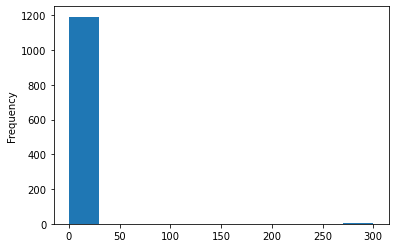

In [74]:
df_g['idle_time'].plot(kind='hist')
plt.show()

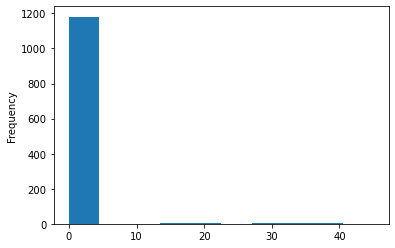

In [75]:
df_g['idle_men'].plot(kind='hist')
plt.show()

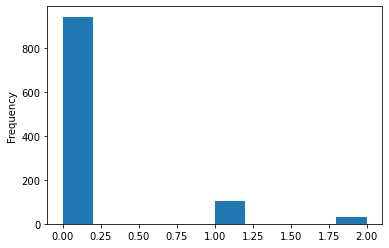

In [76]:
df_gp['no_of_style_change'].plot(kind='hist')
plt.show()

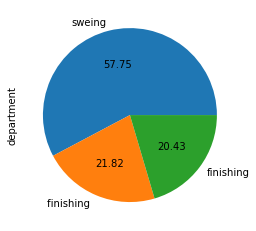

In [77]:
df_gp['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

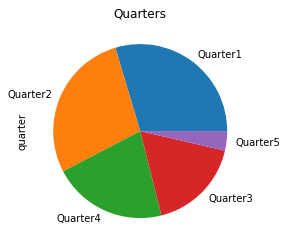

In [78]:
plt.title("Quarters")
df_gp['quarter'].value_counts().plot(kind='pie')
plt.show()

## Data Exploration

Correlation

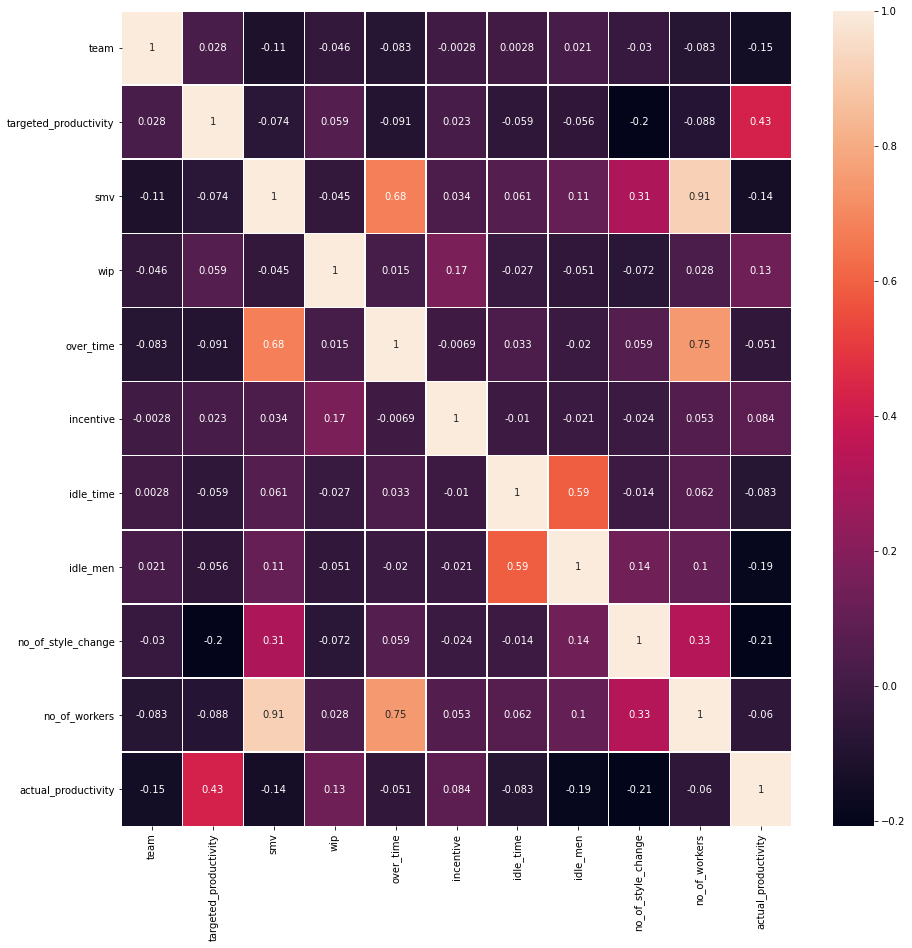

In [79]:
corrMatrix = df_gp.corr()
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

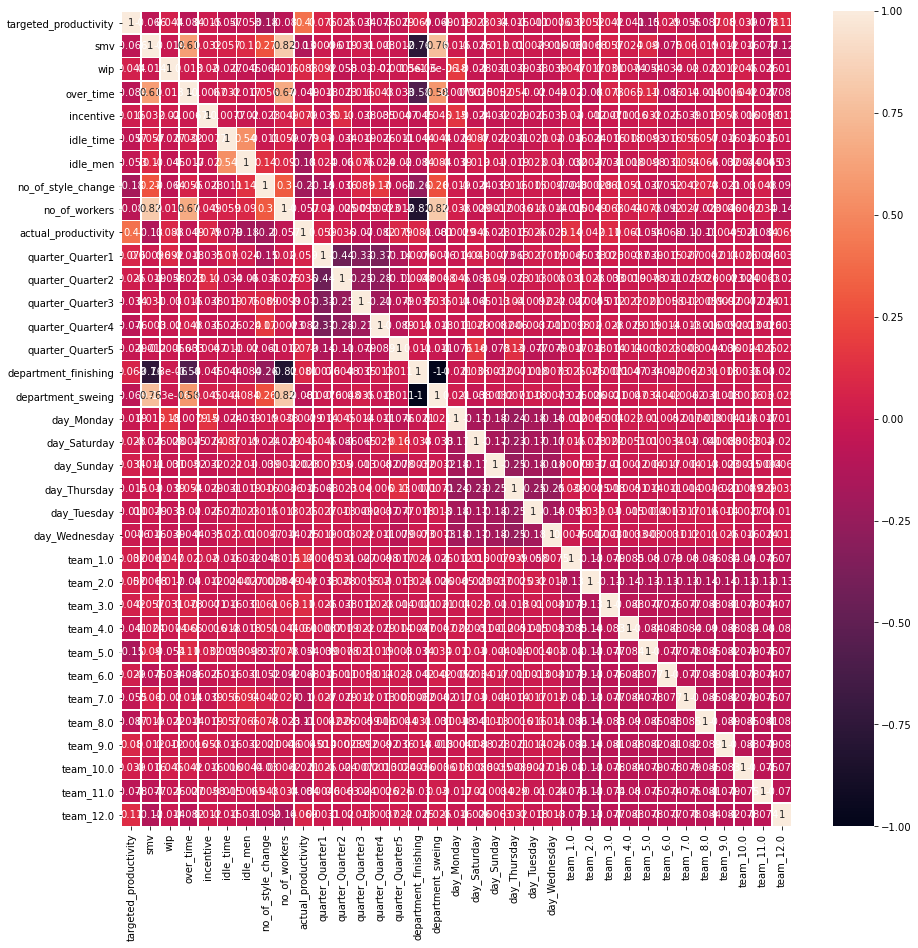

In [80]:
corrMatrix = df_g.corr()

fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

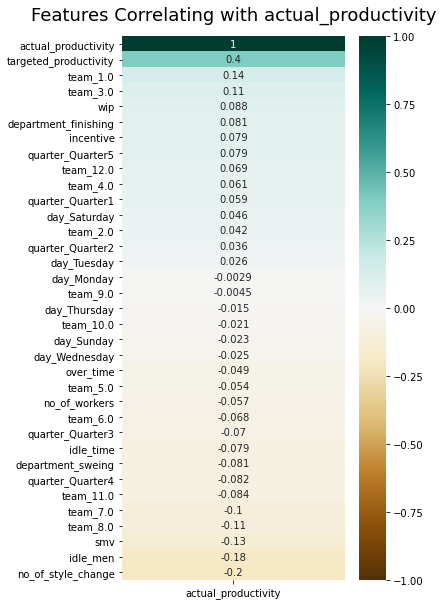

In [81]:
corrMatrix = df_g.corr()

plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

In [82]:
#We found that correlation between svm and no_of_workers is high
#df_g.drop('no_of_workers',axis = 1, inplace = True)



In [83]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    1197 non-null   float64
 3   over_time              1197 non-null   float64
 4   incentive              1197 non-null   float64
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   float64
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  quarter_Quarter1       1197 non-null   uint8  
 11  quarter_Quarter2       1197 non-null   uint8  
 12  quarter_Quarter3       1197 non-null   uint8  
 13  quarter_Quarter4       1197 non-null   uint8  
 14  quarter_Quarter5       1197 non-null   uint8  
 15  depa

In [84]:
df_g.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_3.0,team_4.0,team_5.0,team_6.0,team_7.0,team_8.0,team_9.0,team_10.0,team_11.0,team_12.0
0,0.80,26.16,1108.00,7080.0,98.0,0.0000,0.3918,0,59.0,0.940725,...,0,0,0,0,0,1,0,0,0,0
1,0.75,3.94,1190.47,960.0,0.0,0.7999,0.0000,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.00,3660.0,50.0,0.0000,0.0000,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,1,0
3,0.80,11.41,968.00,3660.0,50.0,0.0000,0.0000,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1170.00,1920.0,50.0,0.0000,0.0000,0,56.0,0.800382,...,0,0,0,0,0,0,0,0,0,0


## Scaling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Determining target and independent variables
X = df_g.drop('actual_productivity', axis = 1)
y = df_g['actual_productivity']

#Split the data into test and train
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [86]:
#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (897, 34)
X_test : (300, 34)
y_train : (897,)
y_test : (300,)


# Bagging 

### Decision Tree regressor

In [102]:
param_grid = {'max_depth': [1,3,5,7]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [1, 3, 5, 7]}


In [105]:
from sklearn.tree import DecisionTreeRegressor
train_accuracy_score_dtr=[]
test_accuracy_score_dtr=[]

depth=[1,2,3,5,7,10]
for i in depth:
    dtr=DecisionTreeRegressor(max_depth=i,random_state=0)
    dtr.fit(X_train,y_train)
    train_accuracy_score_dtr.append(dtr.score(X_train,y_train))
    test_accuracy_score_dtr.append(dtr.score(X_test,y_test))
    
print("Train score : ",train_accuracy_score_dtr)
print("Test score : ",test_accuracy_score_dtr)


Train score :  [0.14081714781612653, 0.2307936885283769, 0.31086495194929964, 0.5020019400165951, 0.6364222564064677, 0.8136518601299813]
Test score :  [0.16774473003280277, 0.18694944714193606, 0.2351933512689799, 0.11475894659363695, 0.008062127362500893, -0.06697966196625904]


In [78]:
param_grid = {'max_samples': [0.01,0.1, 0.5, 1,10], 'max_features': [0.1, 0.2, 0.5, 1],
              'n_estimators': [100, 200, 300, 500]} #,'max_depth': [1, 3, 5, 7]
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_samples': [0.01, 0.1, 0.5, 1, 10], 'max_features': [0.1, 0.2, 0.5, 1], 'n_estimators': [100, 200, 300, 500]}


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 3,random_state= 0)
bag_reg = BaggingRegressor(dt_reg, bootstrap= True, random_state=0)
grid_search = GridSearchCV(bag_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Best cross-validation score: 0.3238


In [80]:
dt_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 3, random_state = 0))
bag_reg = BaggingRegressor(dt_reg, max_features= 0.5, max_samples= 0.5, n_estimators= 200, bootstrap= True, random_state = 0)
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                                                      random_state=0)),
                 max_features=0.5, max_samples=0.5, n_estimators=200,
                 random_state=0)

In [81]:

print('Train score: %.2f'%bag_reg.score(X_train, y_train))
print('Test score: %.2f'%bag_reg.score(X_test, y_test))

Train score: 0.36
Test score: 0.30


### Random Forest Regressor

In [82]:
param_grid = {'max_samples': [0.01, 0.1, 0.5, 1, 10, 100], 'max_features': [0.1, 0.2, 0.5, 1, 2, 5],
              'n_estimators': [100, 200, 300, 500], 'max_depth': [1, 3, 5, 7]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_samples': [0.01, 0.1, 0.5, 1, 10, 100], 'max_features': [0.1, 0.2, 0.5, 1, 2, 5], 'n_estimators': [100, 200, 300, 500], 'max_depth': [1, 3, 5, 7]}


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(rnd_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'max_depth': 7, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


In [84]:
print("Best parameters: {}".format(grid_search.best_score_))

Best parameters: 0.4431559946337142


In [85]:
rnd_reg = RandomForestRegressor(max_depth = 7, max_features= 0.5, max_samples= 0.5, 
                                n_estimators= 500,random_state=0)
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.5, max_samples=0.5,
                      n_estimators=500, random_state=0)

In [86]:
print('Train score: %.2f'%rnd_reg.score(X_train, y_train))
print('Test score: %.2f'%rnd_reg.score(X_test, y_test))

Train score: 0.63
Test score: 0.41


# Pasting
### Decision tree regressor

In [94]:
param_grid = {'max_samples': [0.01,0.1, 0.5, 1,10], 'max_features': [0.1, 0.2, 0.5, 1],
              'n_estimators': [100, 200, 300, 500]} 
print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'max_samples': [0.01, 0.1, 0.5, 1, 10], 'max_features': [0.1, 0.2, 0.5, 1], 'n_estimators': [100, 200, 300, 500]}


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 3,random_state= 0)
past_reg = BaggingRegressor(dt_reg, bootstrap= False, random_state=0)
grid_search = GridSearchCV(past_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.3281


In [326]:
dt_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 3, random_state = 0))
past_reg = BaggingRegressor(dt_reg, max_features= 0.5, max_samples= 0.5, 
                           n_estimators= 500, bootstrap= False, random_state = 0)
past_reg.fit(X_train, y_train)

print('Train score: %.2f'%past_reg.score(X_train, y_train))
print('Test score: %.2f'%past_reg.score(X_test, y_test))

Train score: 0.37
Test score: 0.30


### Random Forest Regressor

In [90]:
param_grid = {'max_samples': [0.01, 0.1, 0.5, 1, 10, 100], 
              'max_features': [0.1, 0.2, 0.5, 1, 2, 5],
              'n_estimators': [100, 200, 300, 500], 
              'max_depth': [1, 3, 5, 7],
              'bootstrap':[False]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_samples': [0.01, 0.1, 0.5, 1, 10, 100], 'max_features': [0.1, 0.2, 0.5, 1, 2, 5], 'n_estimators': [100, 200, 300, 500], 'max_depth': [1, 3, 5, 7], 'bootstrap': [False]}


In [91]:
rnd_reg = RandomForestRegressor(random_state=0)
grid_rf = GridSearchCV(rnd_reg, param_grid, cv= 5, return_train_score= True)
grid_rf.fit(X_train, y_train)


print("Best parameters: {}".format(grid_rf.best_params_))
print("Best parameters: {}".format(grid_rf.best_score_))

Best parameters: {'bootstrap': False, 'max_depth': 7, 'max_features': 0.5, 'max_samples': 0.01, 'n_estimators': 500}
Best parameters: 0.4277044743668917


In [97]:
rnd_reg_p = RandomForestRegressor(bootstrap = False, max_depth = 7, max_features= 0.5, max_samples= 0.01, 
                                n_estimators= 500,random_state=0)
rnd_reg_p.fit(X_train, y_train)

print('Train score: %.2f'%rnd_reg_p.score(X_train, y_train))
print('Test score: %.2f'%rnd_reg_p.score(X_test, y_test))

Train score: 0.70
Test score: 0.41


# AdaBoost boosting

### Adaboost Regressor

In [98]:
param_grid = {'n_estimators': [100, 200, 500, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 500, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1]}


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(random_state= 0)
grid_search = GridSearchCV(ada_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best parameters: {}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best parameters: 0.3611187663951473


In [100]:
ada_reg = AdaBoostRegressor(learning_rate =  0.01,n_estimators =  500, random_state = 0 )
ada_reg.fit(X_train, y_train)

print('Train score: %.2f'%ada_reg.score(X_train, y_train))
print('Test score: %.2f'%ada_reg.score(X_test, y_test))

Train score: 0.43
Test score: 0.32


### Decision Tree regressor

In [106]:
param_grid = {'max_depth': [1,3,5,7]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [1, 3, 5, 7]}


In [107]:
from sklearn.tree import DecisionTreeRegressor
train_accuracy_score_dtr=[]
test_accuracy_score_dtr=[]

depth=[1,2,3,5,7,10]
for i in depth:
    dtr=DecisionTreeRegressor(max_depth=i,random_state=0)
    dtr.fit(X_train,y_train)
    train_accuracy_score_dtr.append(dtr.score(X_train,y_train))
    test_accuracy_score_dtr.append(dtr.score(X_test,y_test))
    
print("Train score : ",train_accuracy_score_dtr)
print("Test score : ",test_accuracy_score_dtr)

Train score :  [0.14081714781612653, 0.2307936885283769, 0.31086495194929964, 0.5020019400165951, 0.6364222564064677, 0.8136518601299813]
Test score :  [0.16774473003280277, 0.18694944714193606, 0.2351933512689799, 0.11475894659363695, 0.008062127362500893, -0.06697966196625904]


Text(0, 0.5, 'Accuracy')

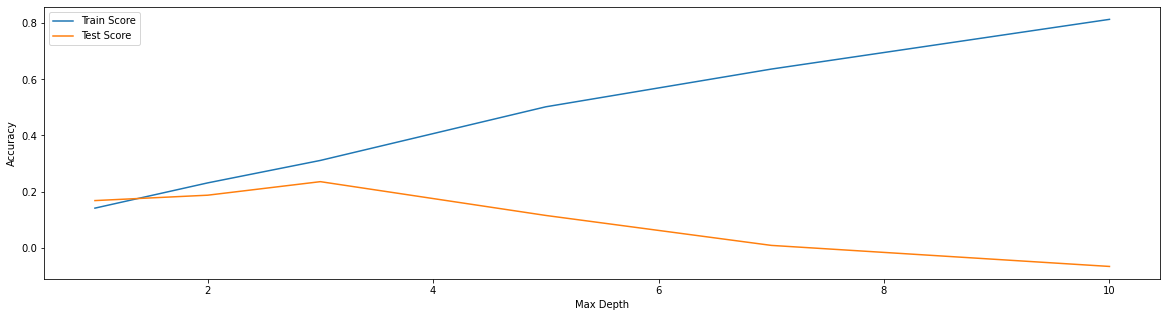

In [108]:
plt.subplots(figsize=(20,5))
plt.plot(depth, train_accuracy_score_dtr, label="Train Score")
plt.plot(depth, test_accuracy_score_dtr, label="Test Score")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

In [109]:
param_grid = {'learning_rate': [0.01, 0.01, 0.1, 0.5, 1, 10], 
              'n_estimators': [100, 200, 300, 500]} 
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'learning_rate': [0.01, 0.01, 0.1, 0.5, 1, 10], 'n_estimators': [100, 200, 300, 500]}


In [110]:
from sklearn.ensemble import AdaBoostRegressor

dt_reg = DecisionTreeRegressor(max_depth = 3,random_state= 0)
ada_dt_reg = AdaBoostRegressor(dt_reg, random_state=0)
grid_ada_dt = GridSearchCV(ada_dt_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_ada_dt.fit(X_train, y_train)

print("Best parameters: {}".format(grid_ada_dt.best_params_))
print("Best parameters: {}".format(grid_ada_dt.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best parameters: 0.3611187663951473


In [111]:

ada_reg_dt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=500, 
                              learning_rate=0.01, random_state=0)

ada_reg_dt.fit(X_train, y_train)

print('Train score: %.2f'%ada_reg_dt.score(X_train, y_train))
print('Test score: %.2f'%ada_reg_dt.score(X_test, y_test))

Train score: 0.43
Test score: 0.32


# Gradient Boosting

In [112]:
param_grid = {'n_estimators': [200, 500, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [1, 2, 5]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state= 0)
grid_gb_reg = GridSearchCV(gb_reg, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_gb_reg.fit(X_train, y_train)

print("Best parameters: {}".format(grid_gb_reg.best_params_))
print("Best parameters: {}".format(grid_gb_reg.best_score_))

Parameter grid:
{'n_estimators': [200, 500, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [1, 2, 5]}
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best parameters: 0.4519253017488919


In [113]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)

print('Train score: %.2f'%gb_reg.score(X_train, y_train))
print('Test score: %.2f'%gb_reg.score(X_test, y_test))

Train score: 0.62
Test score: 0.44


<AxesSubplot:>

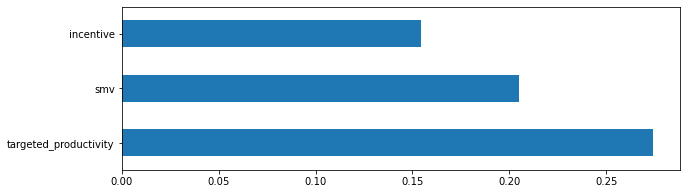

In [114]:
plt.subplots(figsize = (10,3))
(pd.Series(gb_reg.feature_importances_, index=X.columns)
   .nlargest(3)
   .plot(kind='barh')) 

# PCA

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_

26

In [117]:
X_train_pca.shape

(897, 26)

In [118]:
y_train

548     0.892194
362     0.750068
2       0.800570
942     0.410833
1041    0.555431
          ...   
1033    0.750474
763     0.500802
835     0.700096
559     0.411554
684     0.750648
Name: actual_productivity, Length: 897, dtype: float64

### Regression Models

#### Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_pca,y_train)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [120]:
X_train_pca.shape

(897, 26)

In [121]:
y_train.shape

(897,)

In [122]:
print('Train score: %.2f'%lreg.score(X_train_pca, y_train))
print('Test score: %.2f'%lreg.score(X_test_pca, y_test))

Train score: 0.25
Test score: 0.24


## K Neighbors Regressor


%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = df_gp[['targeted_productivity','smv','over_time','incentive','idle_time',]]
scatter_matrix(df_gp[attributes], figsize = (15,15), c = df_gp.actual_productivity, alpha = 0.8, marker = 'O')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_g.drop('actual_productivity', axis = 1)
y = df_g['actual_productivity']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [123]:
#Used grid search method to validate and get best parameters
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor

k_range = list(range(1,100))

param_grid = dict(n_neighbors = k_range)

knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'r2')
grid.fit(X_train_pca,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)



0.16136079216174717
{'n_neighbors': 17}
KNeighborsRegressor(n_neighbors=17)


Text(0, 0.5, 'MSE')

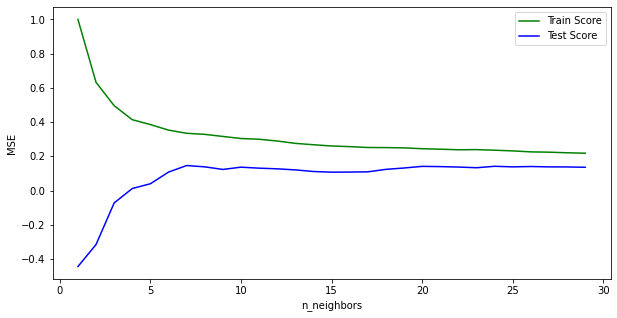

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
from mlxtend.plotting import plot_decision_regions


train_score_array = []
test_score_array = []

for k in range(1,30):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca, y_train)
    train_score_array.append(knn_reg.score(X_train_pca, y_train))
    test_score_array.append(knn_reg.score(X_test_pca, y_test))

x_axis = range(1,30)
plt.subplots(figsize = (10,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

[-0.5486652000300001, -0.5456326499714287, -0.5360903456227273, -0.5349187339608695, -0.5350374515749999, -0.5275181435800002, -0.5260840820461539, -0.5284937752777779, -0.5289751512071429, -0.5319907094275863, -0.5302981954333333, -0.5288922159225807, -0.527028087728125, -0.5264519153030303, -0.5249835001294116, -0.5244477816314286, -0.5216538776416667, -0.5228919562513512, -0.522039339281579, -0.5192977003102566, -0.5186031811575, -0.5175351440048781, -0.5162475155452382, -0.5134532111581397, -0.514134623525, -0.5135837826822222, -0.5122592489369565, -0.5117164196978724, -0.5117935803395832, -0.511419438920408, -0.511017701658, -0.5125799394686276, -0.5132984189480769, -0.5118132889188678, -0.510806238738889, -0.5125518499290909, -0.5131209189571428, -0.5127214427122807, -0.5133654930362068, -0.5124793358288134, -0.5119168290333332, -0.5112806713918033, -0.5118500976709678, -0.5109571488238094, -0.510371379065625]


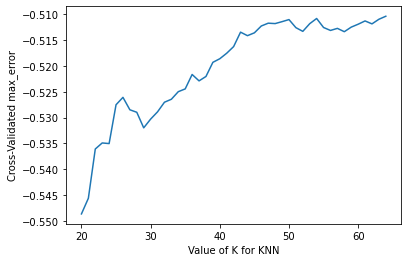

In [134]:
from sklearn.model_selection import cross_val_score

k_range = list(range(20, 65))
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='max_error')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated max_error')
plt.show()

[-0.7681663788508863, -0.40770068317738933, -0.28892734607070725, -0.2392244331809316, -0.19429393867801864, -0.18653520917305005, -0.16265664098376725, -0.1472953104959293, -0.14628672432161238, -0.1364199451469901, -0.11694720290060316, -0.11602575770729137, -0.11603172236098751, -0.11685975839536107, -0.12330652774084223, -0.11669817450333878, -0.11195344802863402, -0.10148129455943318, -0.09861309645815135, -0.09201291581853731, -0.08584209340648667, -0.07731840230300965, -0.07772652080956434, -0.0810813748591751, -0.07244157971413624, -0.07487355287070847, -0.07346867059647094, -0.07196576084842447, -0.07085971440618978, -0.06697384513455015, -0.06470813668491944, -0.06399353680046904, -0.06296393912702199, -0.06325625792146694, -0.06418498317201414, -0.06511634104624522, -0.06390952354953179, -0.06411086126229286, -0.06434111041586306, -0.06542630578847633, -0.06358019822045427, -0.06525848529561681, -0.06279733775472622, -0.05956222535539278, -0.05743325464318916, -0.05524503104

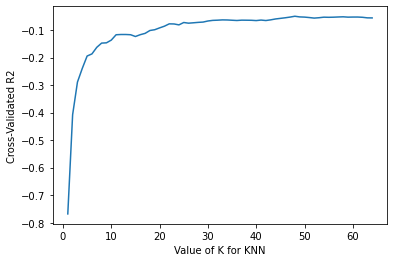

In [135]:
k_range = list(range(1, 65))
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='r2')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated R2')
plt.show()

In [ ]:
#From the above three graphs, we oberved that the best train score and test score is for when n = 60

In [137]:
knn_reg = KNeighborsRegressor(60)
knn_reg.fit(X_train_pca, y_train)
train = knn_reg.score(X_train_pca, y_train)
print('Train Score :',train)

test = knn_reg.score(X_test_pca, y_test)
print('Test Score :',test)

Train Score : 0.16175622779827414
Test Score : 0.1283990268172054


Text(0.5, 0, 'WIP')

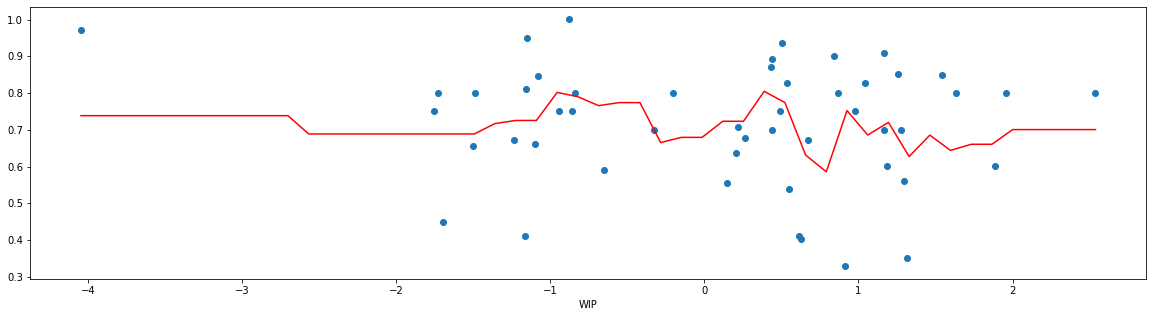

In [139]:
X_b = X_train_pca[:50,3].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(6)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('WIP')

In [ ]:
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse


In [459]:
## Cross-Validation

In [141]:
#Cross validation with the best knn model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(60)

knn_reg.fit(X_train_pca, y_train)

y_pred_knn=knn_reg.predict(X_test_pca)

# Cross Validation
cv_scores = cross_val_score(knn_reg, X_train_pca, y_train,cv = 5)
cv_test_scores = cross_val_score(knn_reg, X_test_pca, y_test,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
#print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))

Cross-validation training scores (5-fold): [0.09692074 0.08344632 0.12080916 0.1558527  0.11506491]
Cross-validation testing scores (5-fold): [0.05836375 0.03509087 0.06500303 0.0705564  0.07826043]
Mean cross-validation training score (5-fold): 0.1144
Mean cross-validation testing score (5-fold): 0.0615


## Linear regression using the Normal Equation

In [89]:
#from sklearn.preprocessing import MinMaxScaler

#X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

#scaler = MinMaxScaler()

#X_train = scaler.fit_transform(X_train_org)
#X_test = scaler.transform(X_test_org)

In [142]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
print('Train score :', lreg.score(X_train_pca, y_train))
print('Test Score :', lreg.score(X_test_pca, y_test))

Train score : 0.2548493374000189
Test Score : 0.2411717523715169


Text(0.5, 0, 'RM')

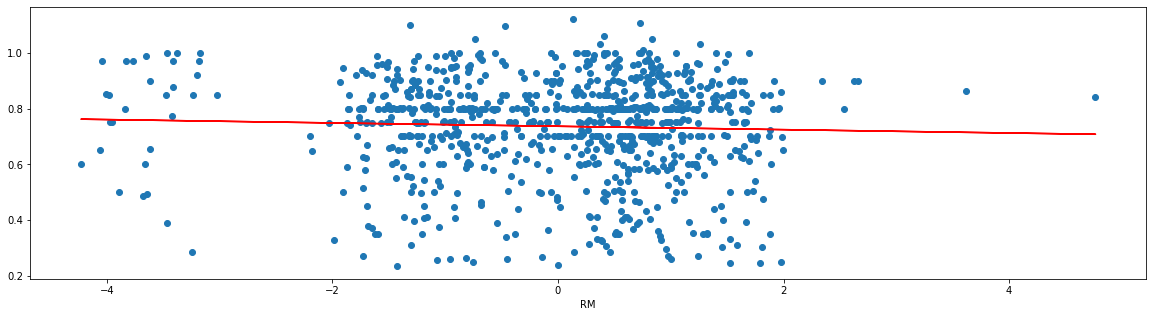

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_pca[:,3].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [144]:
# Cross Validation with linear Regression
cv_scores = cross_val_score(lreg, X_train_pca, y_train,cv = 5)
cv_test_scores = cross_val_score(lreg, X_test_pca, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
#print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))

Cross-validation training scores (5-fold): [0.15901077 0.15260254 0.09945843 0.22676234 0.19467969]
Cross-validation testing scores (5-fold): [ 0.12822201 -0.30895947  0.28221031  0.20320632  0.18493234]
Mean cross-validation training score (5-fold): 0.1665
Mean cross-validation testing score (5-fold): 0.0979


## SGD Regressor

In [145]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd_reg.fit(X_train_pca, y_train)
print(sgd_reg.score(X_train_pca, y_train))
print(sgd_reg.score(X_test_pca, y_test))

-3.9784414240879957e+24
-3.3736518805392166e+24


In [149]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

param = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter':[10000],
    'tol': [0.0001]
}

print("Parameter grid:\n{}".format(param))

Parameter grid:
{'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1'], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'max_iter': [10000], 'tol': [0.0001]}


In [152]:
sgd_reg = SGDRegressor(random_state= 0)
grid_sgd_reg = GridSearchCV(sgd_reg, param, cv= 5, n_jobs= -1, return_train_score= True)
grid_sgd_reg.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_sgd_reg.best_params_))
print("Best parameters: {}".format(grid_sgd_reg.best_score_))

Best parameters: {'alpha': 0.1, 'learning_rate': 'invscaling', 'loss': 'huber', 'max_iter': 10000, 'penalty': 'l2', 'tol': 0.0001}
Best parameters: 0.17613793489155835


In [155]:
#SGD Cross validation with grid search results
sgd_reg = SGDRegressor(random_state= 0, alpha = 0.1, max_iter = 10000, learning_rate = 'invscaling', 
                       loss = 'huber', penalty = 'l2', tol = 0.0001, eta0 = 0.05, shuffle = True)
sgd_reg.fit(X_train_pca, y_train)
print('Train Score : ',sgd_reg.score(X_train_pca, y_train))
print('Test Score : ',sgd_reg.score(X_test_pca, y_test))

Train Score :  0.22705220359093514
Test Score :  0.25828772937541167


## Polynomial regression

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param = {'polynomialfeatures__degree': [1,2,3,4,5]}
grid_poly = GridSearchCV(PolynomialRegression(), param, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(X_train_pca, y_train)

best = model3.best_params_
print("Best parameters: {}".format(grid_poly.best_params_))

Best parameters: {'polynomialfeatures__degree': 2}


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg1 = LinearRegression()
lreg1.fit(X_train_poly, y_train)
pred_poly=lreg1.predict(X_test_poly)

print('Train score: {}'.format(lreg1.score(X_train_poly, y_train)))
print('Test score: {}'.format(lreg1.score(X_test_poly,y_test)))

Train score: 0.2548493374000189
Test score: 0.24117175237151678


## Ridge

In [101]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd


In [102]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,  y_train)
    train_score_list.append(ridge.score(X_train_pca, y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))

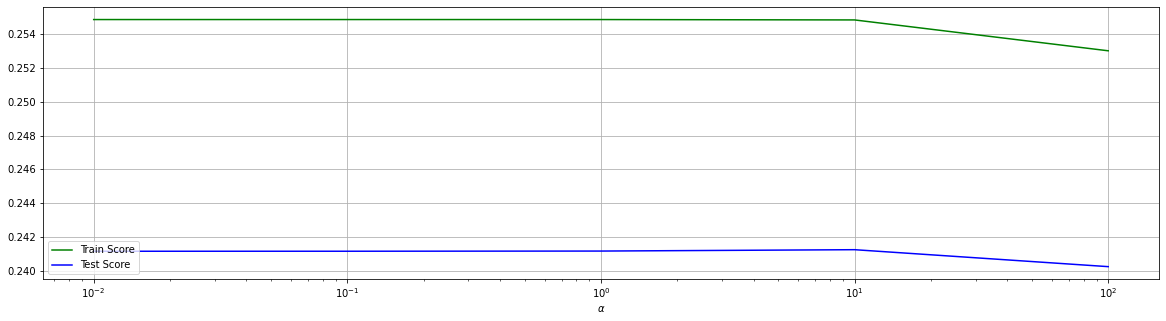

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [104]:
print(train_score_list)
print(test_score_list)

[0.2548493373771722, 0.25484933511583263, 0.25484910945320804, 0.2548270058435953, 0.2530057275978239]
[0.24117186992443607, 0.24117292557758407, 0.24118325264734664, 0.24126409450747544, 0.24026321566862108]


In [109]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_pca, y_test)))

Train score: 0.2548
Test score: 0.2412


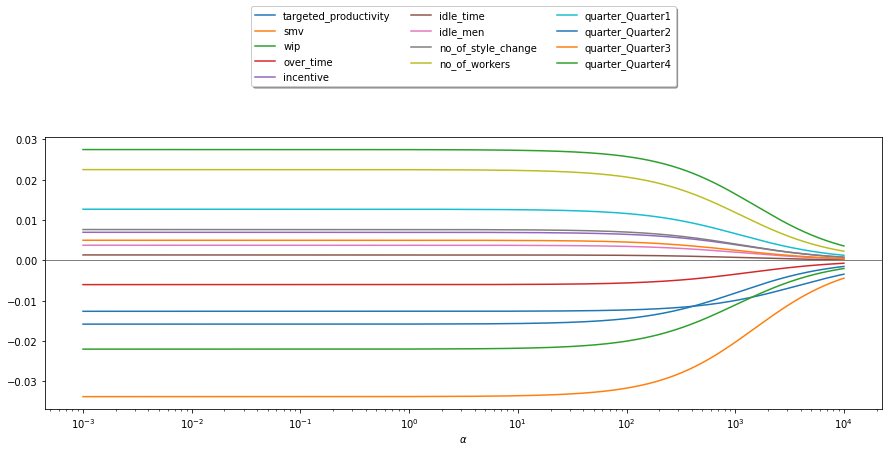

In [110]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [98]:
# Feature selection based on grid search
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1000,100,10,1,0.1,0.01,0.001,0.0001,0] ,'max_iter': [100000],
                 "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge,cv=5, n_jobs=-1)

Ridge_GS.fit(X_train_pca,y_train)
print("Best_parameters:",Ridge_GS.best_params_)


Best_parameters: {'alpha': 100, 'fit_intercept': True, 'max_iter': 100000, 'solver': 'lsqr'}


In [101]:
ridge_reg = Ridge(alpha =  100, fit_intercept = True, max_iter = 100000, solver = 'lsqr')

ridge_reg.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(ridge_reg.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(ridge_reg.score(X_test_pca, y_test)))

Train score: 0.2530
Test score: 0.2395


### LASSO


In [111]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))

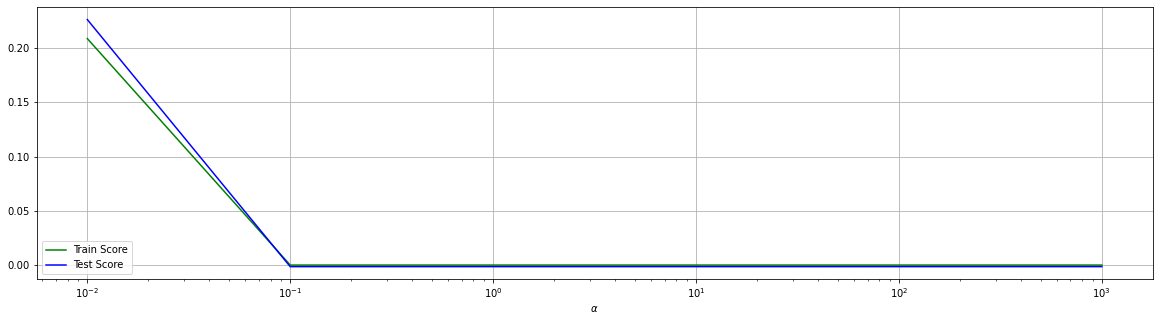

In [112]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

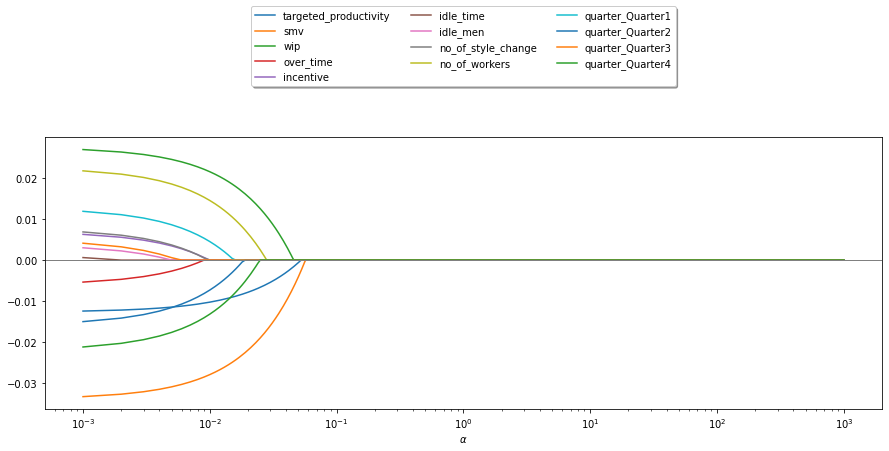

In [113]:
%matplotlib inline

x_range1 = np.linspace(0.001,1,1000 ).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 100).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=1, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [116]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_pca, y_train)
dict(zip(X.columns, lasso.coef_))

{'targeted_productivity': -0.012400999557743172,
 'smv': -0.03322646979316926,
 'wip': 0.0269007493105949,
 'over_time': -0.005351502518551282,
 'incentive': 0.006262964971043319,
 'idle_time': 0.0006151626400618394,
 'idle_men': 0.003000255766786948,
 'no_of_style_change': 0.0068558392427790875,
 'no_of_workers': 0.021720728000015756,
 'quarter_Quarter1': 0.011872691264549921,
 'quarter_Quarter2': -0.014970639074843544,
 'quarter_Quarter3': 0.004111596230392531,
 'quarter_Quarter4': -0.0211430714952926,
 'quarter_Quarter5': 0.0003439187443553561,
 'department_finishing': 0.007552084478129708,
 'department_sweing': 0.004136785322480005,
 'day_Monday': -0.01698030393180334,
 'day_Saturday': -0.004157091025800212,
 'day_Sunday': 0.005892561265138623,
 'day_Thursday': 0.0051065597230681836,
 'day_Tuesday': 0.014982020163640792,
 'day_Wednesday': 0.003118018288393055,
 'team_1.0': 0.0,
 'team_2.0': 0.012247717310867571,
 'team_3.0': -0.0,
 'team_4.0': -0.03813369022501752}

In [118]:
# Grid Search for Algorithm Tuning
params = {'alpha': [1000,100,10,1,0.1,0.01,0.001],'max_iter': [10,100,1000,10000, 100000]}

#cross validation with 5 folds
grid_lasso = GridSearchCV(Lasso(), params, cv=5)
grid_lasso.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                         'max_iter': [10, 100, 1000, 10000, 100000]})

In [119]:
print("Best_parameters:",grid_lasso.best_params_)

Best_parameters: {'alpha': 0.001, 'max_iter': 10}


In [122]:
X_test_pca.shape

(300, 26)

In [ ]:
y_train.shape

In [123]:
lasso = Lasso(alpha = 0.001, max_iter = 10)
lasso.fit(X_train_pca,y_train)

print('Train Score : ', lasso.score(X_train_pca,y_train))
print('Test Score : ', lasso.score(X_test_pca,y_test))

Train Score :  0.2541724237167089
Test Score :  0.24556112648809714


## Decision Tree

In [537]:
reg= ExtraTreesRegressor()


In [ ]:
import numpy as np
columns_ = X_train_pca.iloc[:1, 3:12].columns
feat_importances = pd.Series(reg.feature_importances_, index=X_train_pca.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [127]:
from sklearn.tree import DecisionTreeRegressor


reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train_pca,y_train)
print('Train score :', reg_decision_model.score(X_train_pca,y_train))
print('Test Score :', reg_decision_model.score(X_test_pca,y_test))


Train score : 0.9998753794936205
Test Score : -0.44694216297828193


In [ ]:
# HYper parameter tuning

In [130]:
parameters={ "max_depth" : [1,3,5,7,9,11,12] }

In [128]:
from sklearn.tree import DecisionTreeRegressor
train_accuracy_score_dtr=[]
test_accuracy_score_dtr=[]

depth=[1,3,5,7,9,10,11]
for i in depth:
    dtr=DecisionTreeRegressor(max_depth=i,random_state=0)
    dtr.fit(X_train_pca,y_train)
    train_accuracy_score_dtr.append(dtr.score(X_train_pca,y_train))
    test_accuracy_score_dtr.append(dtr.score(X_test_pca,y_test))

print("Train score : ",train_accuracy_score_dtr)
print("Test score : ",test_accuracy_score_dtr)

Train score :  [0.07883647123610016, 0.2324953448960605, 0.4081722631281387, 0.5490475599679483, 0.6903869612544611, 0.7714095879067362, 0.8392928321567888]
Test score :  [0.042065362305479304, 0.10431056257468396, -0.08265010811696771, -0.16329526689647933, -0.1574242570911788, -0.21519038171124105, -0.2835313752592621]


Text(0, 0.5, 'Accuracy')

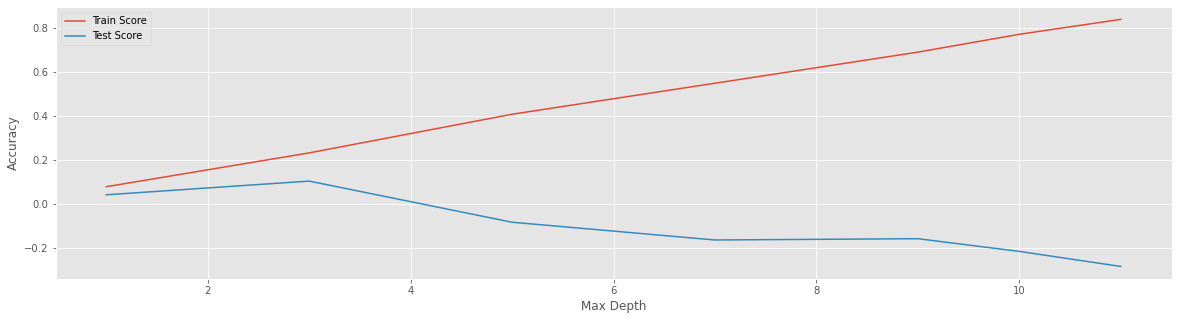

In [129]:
plt.subplots(figsize=(20,5))
plt.plot(depth, train_accuracy_score_dtr, label="Train Score")
plt.plot(depth, test_accuracy_score_dtr, label="Test Score")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

In [135]:
dt = DecisionTreeRegressor(random_state= 0)
grid_dt_reg = GridSearchCV(dt, parameters, cv= 5, n_jobs= -1, return_train_score= True)
grid_dt_reg.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_dt_reg.best_params_))
print("Best parameters: {}".format(grid_dt_reg.best_score_))

Best parameters: {'max_depth': 3}
Best parameters: 0.0807947038634133


In [137]:
dt_reg = DecisionTreeRegressor(max_depth = 3,random_state= 0)
dt_reg.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(dt_reg.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(dt_reg.score(X_test_pca, y_test)))

Train score: 0.2325
Test score: 0.1043


Text(0.5, 0, 'DT')

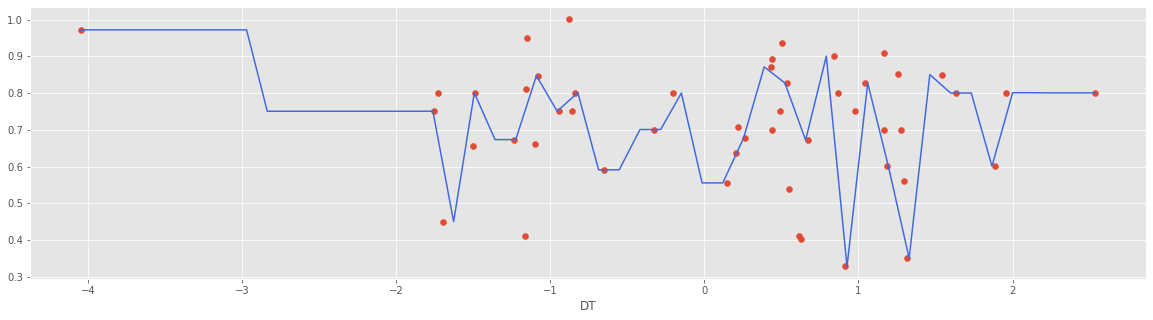

In [138]:
X_b = X_train_pca[:50,3].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('DT')

Text(0.5, 0, 'SVM')

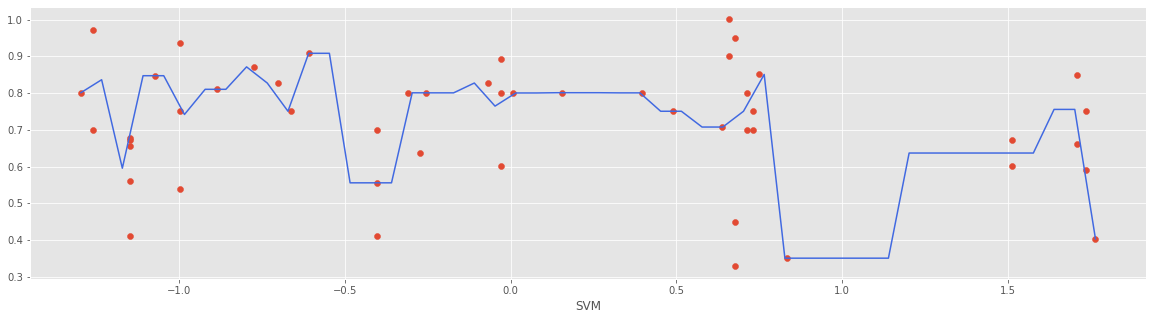

In [313]:

X_b = X_train_pca[:50,3].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('SVM')

## SVR

In [139]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(X_train_pca,y_train)
svr_reg.score(X_train_pca,y_train)

0.6436547552450081

In [140]:
print('Train score: {:.4f}'.format(svr_reg.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(svr_reg.score(X_test_pca, y_test)))


Train score: 0.6437
Test score: 0.1886


## Linear SVR


In [141]:
from sklearn.svm import LinearSVR
li_svc = LinearSVR()
li_svc.fit(X_train_pca,y_train)
li_svc.score(X_train_pca,y_train)

/Users/akhilreddyakavaram/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.17100014058645985

In [142]:
print('Train score: {:.4f}'.format(li_svc.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(li_svc.score(X_test_pca, y_test)))

Train score: 0.1710
Test score: 0.2113


In [146]:
# Grid search for Linear SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]
              }
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [148]:
# Grid search for Linear SVR


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
li_svc = LinearSVR()

grid_li_svc = GridSearchCV(li_svc, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_li_svc.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_li_svc.best_params_))
print("Best parameters: {}".format(grid_li_svc.best_score_))

Best parameters: {'C': 0.01}
Best parameters: 0.11611530376011166


In [149]:
li_svr = LinearSVR(random_state = 0,C = 0.01)
li_svr.fit(X_train_pca, y_train)

print('Train score: {:.4f}'.format(li_svr.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(li_svr.score(X_test_pca, y_test)))


Train score: 0.1957
Test score: 0.2362


In [126]:
# Grid search for Linear SVR
from sklearn.model_selection import GridSearchCV
param_linear = [
  {'C': [0.001,0.01,1, 10]}]
lsvr = LinearSVR()
lsvr_grid = GridSearchCV(estimator=lsvr, param_grid=param_linear, n_jobs=-1,cv=3)
lsvr_grid.fit(X_train_pca[:50], y_train[:50])
y_pred_lsvr=lsvr_grid.predict(X_test[:50])
# View the accuracy score
print('Best score for data1:', lsvr_grid.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',lsvr_grid.best_estimator_.C)

Best score for data1: -0.3707540366288384
Best C: 0.01


In [151]:
#Run model with best parameters
lsvr = LinearSVR(C=0.01)
lsvr.fit(X_train_pca, y_train)
y_pred_lsvr=lsvr.predict(X_test_pca)
print('Train score: {}'.format(lsvr.score(X_train_pca, y_train)))
print('Test score: {}'.format(lsvr.score(X_test_pca,y_test)))

Train score: 0.1948787247993694
Test score: 0.2357878430950724


In [129]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval_orig, X_test_orig, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train_orig, X_valid_orig, y_train, y_valid = train_test_split(X_trainval_orig, y_trainval, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_trainval = scaler.transform(X_trainval_orig)
X_valid = scaler.transform(X_valid_orig)
X_test = scaler.transform(X_test_orig)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svr = SVR(gamma=gamma, C=C)
        svr.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svr.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svr = SVR(**best_parameters)
svr.fit(X_trainval, y_trainval)
test_score = svr.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 672   size of validation set: 225   size of test set: 300

Best score on validation set: 0.24
Best parameters:  {'C': 10, 'gamma': 0.01}
Test set score with best parameters: 0.24


### Grid Search with Cross-Validation for SVR

In [348]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



scaler = MinMaxScaler()
X_trainval = scaler.fit_transform(X_trainval_orig)
X_test = scaler.transform(X_test_orig)

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVR(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.24
Best parameters:  {'C': 10, 'gamma': 0.01}
Test set score with best parameters: 0.24


## SVR Kernel(rbf)

In [152]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score



In [153]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]} #Epsilon as another parameter 
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [157]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(svr_rbf, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_svr_rbf.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best parameters: {}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 1, 'gamma': 0.01}
Best parameters: 0.24969190219240184


In [158]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=.1)
svr_rbf.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svr_rbf.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(svr_rbf.score(X_test_pca, y_test)))

Train score: 0.4903
Test score: 0.2094


## SVR Kernel(Linear)


In [159]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]} #Epsilon as another parameter 
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [160]:
#svr_linear = SVR(kernel='linear')
#grid_svr_linear = GridSearchCV(svr_linear, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
#grid_svr_linear.fit(X_train_pca, y_train)

#print("Best parameters: {}".format(grid_svr_linear.best_params_))
#print("Best parameters: {}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 0.01, 'gamma': 0.001}
Best parameters: 0.1693143620792043


In [161]:
svr_linear = SVR(kernel='linear', C=0.01, gamma=0.001)
svr_linear.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svr_linear.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(svr_linear.score(X_test_pca, y_test)))

Train score: 0.2458
Test score: 0.2441


In [134]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



scaler = MinMaxScaler()
X_trainval = scaler.fit_transform(X_trainval_orig)
X_test = scaler.transform(X_test_orig)

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVR(kernel='linear', C=C, gamma=gamma)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.24
Best parameters:  {'C': 10, 'gamma': 0.01}
Test set score with best parameters: 0.24


In [135]:
svr_lin = SVR(kernel='linear', C=10, gamma=0.01)
svr_lin.fit(X_train,y_train)
svr_lin.score(X_train,y_train)


0.2748018636738627

In [136]:
svr_lin.fit(X_test,y_test)
svr_lin.score(X_test,y_test)

0.37883342571458434

## SVR Kernel(Poly)

In [162]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]} #Epsilon as another parameter 
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [165]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(svr_poly, param_grid, cv= 5, n_jobs= -1, return_train_score= True)
grid_svr_poly.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best parameters: {}".format(grid_svr_poly.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.01}
Best parameters: -0.00699279686448584


In [166]:
svr_poly = SVR(kernel='poly', C=0.001, gamma=0.01, epsilon=.1)
svr_poly.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svr_poly.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(svr_poly.score(X_test_pca, y_test)))

Train score: -0.0030
Test score: -0.0042


In [137]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



scaler = MinMaxScaler()
X_trainval = scaler.fit_transform(X_trainval_orig)
X_test = scaler.transform(X_test_orig)

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVR(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.24
Best parameters:  {'C': 10, 'gamma': 0.01}
Test set score with best parameters: 0.24


In [138]:
svr_poly = SVR(kernel='poly', C=10, gamma=0.01, degree=3, epsilon=.1,
               coef0=1)
svr_poly.fit(X_train,y_train)
svr_poly.score(X_train,y_train)

0.3853355594565261

In [139]:
svr_poly.fit(X_test,y_test)
svr_poly.score(X_test,y_test)

0.478097877796407

In [140]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [141]:
svr3= SVR(kernel = 'rbf', gamma =0.01,C=10,epsilon = 0.5)

svr3.fit(X_train, y_train)

y_pred_svr3=svr3.predict(X_test)

print('Train score: {}'.format(svr3.score(X_train, y_train)))
print('Test score: {}'.format(svr3.score(X_test,y_test)))

#Cross Validation
cv_scores = cross_val_score(svr3, X_train, y_train,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr3, X_test, y_test,cv = 5)
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_svr3))))

Train score: -0.10910702142460571
Test score: -0.08931844489948437
Mean cross-validation training score (5-fold): -0.1169
Mean cross-validation testing score (5-fold): -0.2675
Cross-validation training scores (5-fold): [-0.1419369  -0.0659983  -0.08708516 -0.06647776 -0.22319605]
Cross-validation testing scores (5-fold): [-0.3250615  -0.20159613 -0.19635402 -0.20584994 -0.40874192]
RMSE: 0.1780



## Best Model: 
The best model is SVM regressor with kernel poly since it has highest test score of 0.48 and the low RMSE : 0.1780

In [ ]:
#Training the model on FUll data set
X = df_g.drop('actual_productivity', axis = 1)
y = df_g['actual_productivity']

In [ ]:
svr_poly = SVR(kernel='poly', C=10, gamma=0.01, degree=3, epsilon=.1,coef0=1)
svr_poly.fit(X,y)
y_pred_svr_poly=svr_poly.predict(X)




In [ ]:
svr_poly.fit(X,y)
print('Score of the model: ', svr_poly.score(X,y))